**1. import library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2. Import file**

In [2]:
gsheetid_order= "1NsSwcFqtFF4p1KQZb6GBhx4cCALi3O2hJJrriMTF0BE"
sheet_name_order ='ml_project1_data'
gsheet_url_order= "https://docs.google.com/spreadsheets/d/{}/gviz/tq?tqx=out:csv&sheet={}".format(gsheetid_order,sheet_name_order)
df = pd.read_csv(gsheet_url_order)

**3. EDA **

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
## check null and missing data##
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
## Delete missing data##
df= df.dropna()

In [6]:
##Mining data##
## Creat New Column Age##
df['age'] = 2022 -df['Year_Birth']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [8]:
## Create New column##
df['dependence'] = df['Kidhome'] + df['Teenhome']
df['Acceptedall'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response'] 
df['Mnttotal'] = df['MntFishProducts'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntSweetProducts'] + df['MntWines']

In [9]:
## remove column##
df= df.drop(['Year_Birth','Kidhome','Teenhome','Z_CostContact','Z_Revenue'], axis=1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Education            2216 non-null   object 
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Dt_Customer          2216 non-null   object 
 5   Recency              2216 non-null   int64  
 6   MntWines             2216 non-null   int64  
 7   MntFruits            2216 non-null   int64  
 8   MntMeatProducts      2216 non-null   int64  
 9   MntFishProducts      2216 non-null   int64  
 10  MntSweetProducts     2216 non-null   int64  
 11  MntGoldProds         2216 non-null   int64  
 12  NumDealsPurchases    2216 non-null   int64  
 13  NumWebPurchases      2216 non-null   int64  
 14  NumCatalogPurchases  2216 non-null   int64  
 15  NumStorePurchases    2216 non-null   i

In [11]:
pd.unique(df['Marital_Status'])

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [12]:
## change variable in Marial status column##
df = df.replace (to_replace= ["Widow", 'Alone', 'Absurd', 'YOLO'],value = 'Single')

In [13]:
df.describe()

,ID,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,age,dependence,Acceptedall,Mnttotal
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,52247.251354,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,...,0.074007,0.073105,0.064079,0.013538,0.009477,0.150271,53.179603,0.947202,0.448556,563.110108
std,3249.376275,25173.076661,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,...,0.261842,0.260367,0.244950,0.115588,0.096907,0.357417,11.985554,0.749062,0.892440,577.183371
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,0.000000,0.000000,4.000000
25%,2814.750000,35303.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,45.000000,0.000000,0.000000,55.000000
50%,5458.500000,51381.500000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,1.000000,0.000000,342.500000
75%,8421.750000,68522.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000,1.000000,1.000000,964.000000
max,11191.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,129.000000,3.000000,5.000000,2491.000000


In [14]:
print(df.corr())


                           ID    Income   Recency  MntWines  MntFruits  \
ID                   1.000000  0.013095 -0.044376 -0.021084   0.007326   
Income               0.013095  1.000000 -0.003970  0.578650   0.430842   
Recency             -0.044376 -0.003970  1.000000  0.015721  -0.005844   
MntWines            -0.021084  0.578650  0.015721  1.000000   0.387024   
MntFruits            0.007326  0.430842 -0.005844  0.387024   1.000000   
MntMeatProducts     -0.005902  0.584633  0.022518  0.568860   0.547822   
MntFishProducts     -0.023992  0.438871  0.000551  0.397721   0.593431   
MntSweetProducts    -0.005936  0.440744  0.025110  0.390326   0.571606   
MntGoldProds        -0.011172  0.325916  0.017663  0.392731   0.396487   
NumDealsPurchases   -0.040612 -0.083101  0.002115  0.008886  -0.134512   
NumWebPurchases     -0.018476  0.387878 -0.005641  0.553786   0.302039   
NumCatalogPurchases -0.002274  0.589162  0.024081  0.634753   0.486263   
NumStorePurchases   -0.013070  0.52936

In [17]:
df2= pd.DataFrame(df[['ID','Income','Marital_Status','NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth','Mnttotal']])
df2 = df2.pivot(index=['ID','Income','NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'] ,columns ='Marital_Status',values ='Mnttotal').reset_index()

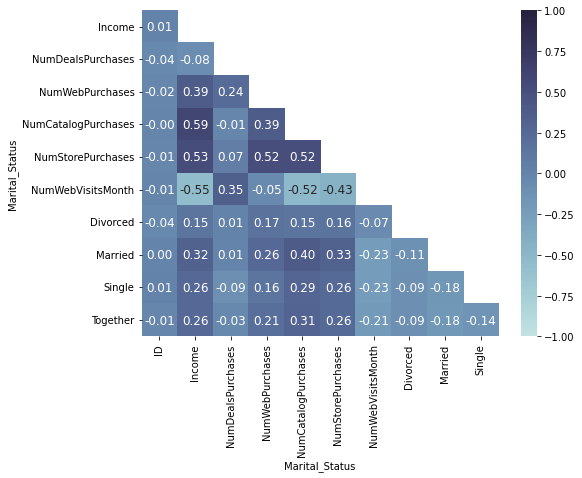

In [18]:
df2=df2.fillna(0)
cor_marial_status = df2.corr()
mask = np.triu(np.ones_like(cor_marial_status))
adjusted_mask = mask[1:, :-1]
adjusted_cor_marial_status= cor_marial_status.iloc[1:,:-1]
cmap = sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True)
plt.figure(figsize=(8,6))
sns.heatmap(adjusted_cor_marial_status,annot=True,cmap=cmap, mask = adjusted_mask, annot_kws ={'fontsize':12}, fmt ='.2f',vmin= -1, vmax = 1)

In [25]:
df5= pd.DataFrame(df[['ID','Income','Education','Mnttotal','dependence','Acceptedall']])
df5 = df5.pivot(index=['ID','Income','dependence','Acceptedall'] ,columns ='Education',values ='Mnttotal').reset_index()

In [26]:
Cor5 = df5.corr().reset_index()

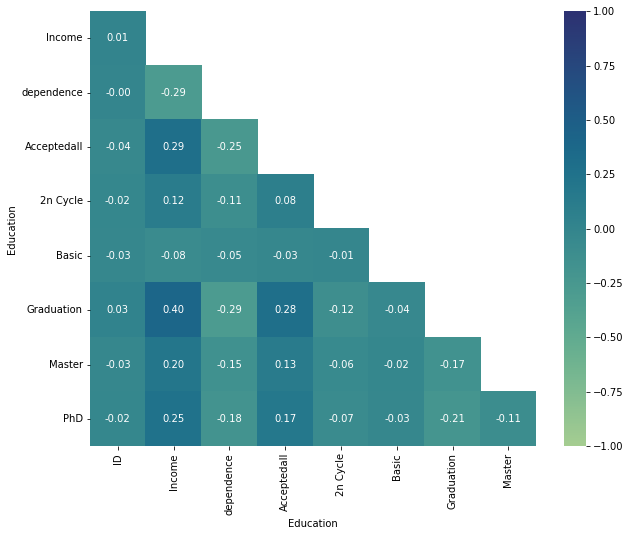

In [27]:
df5=df5.fillna(0)
Cor5 = df5.corr()
mask = np.triu(np.ones_like(Cor5))
adjusted_mask = mask[1:, :-1]
adjusted_cor5= Cor5.iloc[1:, :-1]
plt.figure(figsize=(10,8))
sns.heatmap(adjusted_cor5,annot=True,cmap="crest", mask = adjusted_mask, annot_kws ={'fontsize':10}, fmt='.2f',vmin= -1, vmax = 1)